# Title:  PRCP-1002-HandwrittenDigits
# Problestatement:  Handwritten digits classification using neural network
# Description: The dataset contains 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

# Objective : The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

### ==========================================================

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import rcParams

### Loading images from mnist dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
# split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# Checking X,Y test train split shape

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

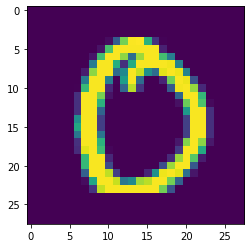

In [10]:
# visualising 88th instance of train image

plt.imshow(x_train[88])

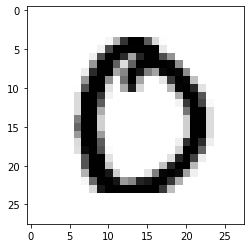

In [11]:
# To reduce the noice converting input images into binary (gray scale)

plt.imshow(x_train[88],cmap=plt.cm.binary)

In [13]:
# binary value of selected input instance

print (x_train[88])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   8  76 202 254 255 163  37   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13 182 253 253 253 253 253 253  23
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 179 253 253 212  91 218 253 253 179
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 105 253 253 160  35 156 253 253 253 253
  250 113   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  19 212 253 253  88 121 253 233 12

# Normalisation or conversion of values zero to one

In [16]:
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize (x_test, axis=1)

# Visualising the normalised image

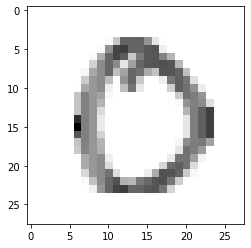

In [17]:
plt.imshow(x_train[88], cmap = plt.cm.binary)

In [18]:
print (x_train[88])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [36]:
# validating the model's authenticity by looking at the TRAINING data record 88 and its target value. Found matching ;-)

print (y_train[88])

0


### Addition of one more dimension to the grade scale

In [21]:
IMZ_SIZE=28 # Resizing
x_train =np.array(x_train).reshape(-1,IMZ_SIZE,IMZ_SIZE,1)
x_test =np.array(x_test).reshape(-1,IMZ_SIZE,IMZ_SIZE,1)
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Creation of Convolution Neural network Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [23]:
# First pass
# 1. Convolution
# 2. Relu
# 3. Max Pooling
# =========================================================
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second pass
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third pass
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
          
model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

### Fitting the model

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train, epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 147s 101ms/step - loss: 0.6280 - accuracy: 0.7905 - val_loss: 0.1160 - val_accuracy: 0.9654
Epoch 2/5
1313/1313 [==============================] - 112s 85ms/step - loss: 0.1050 - accuracy: 0.9679 - val_loss: 0.0883 - val_accuracy: 0.9723
Epoch 3/5
1313/1313 [==============================] - 121s 92ms/step - loss: 0.0730 - accuracy: 0.9766 - val_loss: 0.0815 - val_accuracy: 0.9740
Epoch 4/5
1313/1313 [==============================] - 112s 86ms/step - loss: 0.0567 - accuracy: 0.9827 - val_loss: 0.0748 - val_accuracy: 0.9756
Epoch 5/5
1313/1313 [==============================] - 109s 83ms/step - loss: 0.0443 - accuracy: 0.9847 - val_loss: 0.0704 - val_accuracy: 0.9793


### After first itteration of execution the accuracy was less. We adjusted the epoch value to get optimal accuracy.

### After multiple attempts, we acheived maximum accuracy 98% in epoch=5

### Prediction of the model

In [29]:
prediction = model.predict([x_test])

In [30]:
print (prediction)

[[1.5067155e-08 8.3485311e-06 4.0001833e-06 ... 9.9997640e-01
  1.4624437e-08 3.7509608e-06]
 [2.8828570e-06 3.0753657e-04 9.9961519e-01 ... 2.9918565e-06
  5.5615629e-07 1.4110692e-07]
 [4.6254105e-08 9.9998736e-01 2.2539325e-07 ... 5.6891413e-06
  5.9315801e-07 1.9412729e-08]
 ...
 [9.9896971e-09 1.2978567e-05 7.0969456e-08 ... 3.2615344e-06
  7.8943692e-08 3.1201541e-06]
 [3.3030361e-08 2.2787199e-10 7.0787696e-09 ... 2.4588931e-10
  5.1612187e-05 2.0224588e-08]
 [5.8391106e-06 2.9741230e-08 2.1246075e-05 ... 4.6975113e-10
  8.4679613e-07 9.1781845e-07]]


In [39]:
# Predicting 88th record of test dataset

print (np.argmax(prediction[88]))

6


In [40]:
# Croscheking 88the record of test target value and its is matching

print (y_test[88])

6


# Crosschecking 88the record of test image and its is matching. Hence the model prediction is correct!

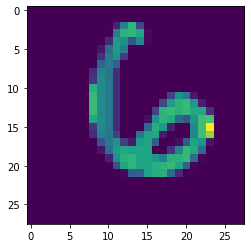

In [44]:
plt.imshow(x_test[88])

In [48]:
# Sample check with 456th record from test dataset

print (np.argmax(prediction[456]))

2


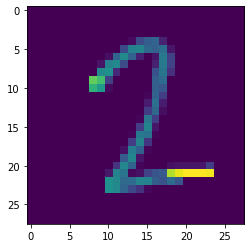

In [49]:
plt.imshow(x_test[456])

## Sample checked multiple images the model predicting accurately!

###### ====================================================================

# Independent Prediction

## Having confrimed the model predictions working well, we selected random image outside the provided dataset and predicted as shown below: 

In [66]:
# pip install opencv-python

In [54]:
# to load input image from specified location

import cv2

In [55]:
inputImg = cv2.imread('new_digits/two.jpg')

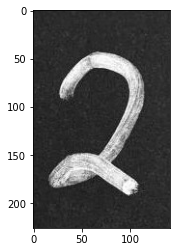

In [56]:
plt.imshow(inputImg)

In [57]:
# FOR NORMALISATION

gray = cv2.cvtColor(inputImg, cv2.COLOR_BGR2GRAY)

In [58]:
gray.shape

(226, 142)

In [59]:
imgResizing = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [60]:
imgResizing.shape

(28, 28)

In [61]:
newImage = tf.keras.utils.normalize (imgResizing, axis=1)

In [62]:
newImage = np.array(imgResizing).reshape(-1, IMZ_SIZE, IMZ_SIZE,1)

In [63]:
ind_prediction = model.predict(newImage)

In [64]:
print (np.argmax(ind_prediction))

2


# Conclusion: The random image inputed above is predicted accuratly by the trained model.